""" Created: 5-May-2021

@author: Deb """

""" The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety.

"""

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set_style('whitegrid')

In [74]:
df = pd.read_csv('titanic_train.csv')

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [77]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


<AxesSubplot:>

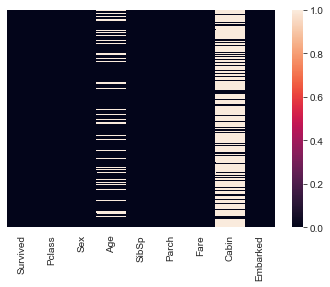

In [78]:
sns.heatmap(df.isnull(), yticklabels=False)

In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [80]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

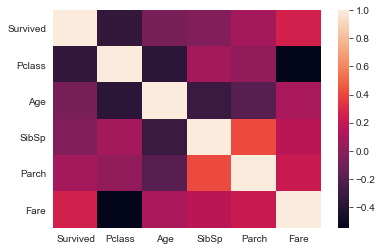

In [81]:
sns.heatmap(df.corr())

In [82]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [83]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

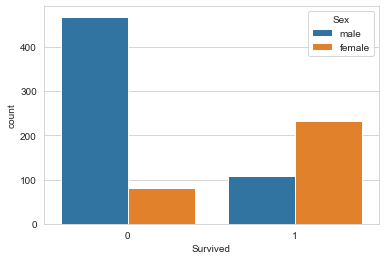

In [84]:
sns.countplot(x='Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

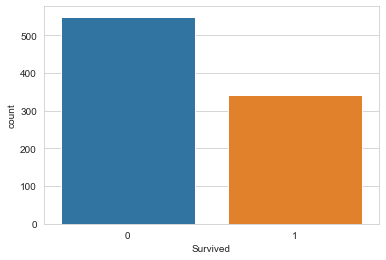

In [85]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

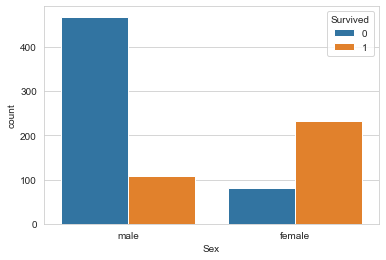

In [86]:
sns.countplot(x='Sex', data=df, hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

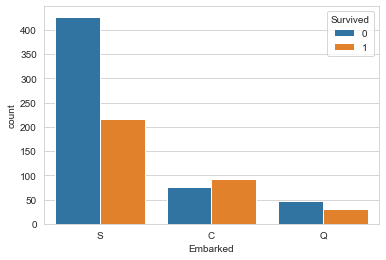

In [87]:
sns.countplot(x='Embarked', data=df, hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

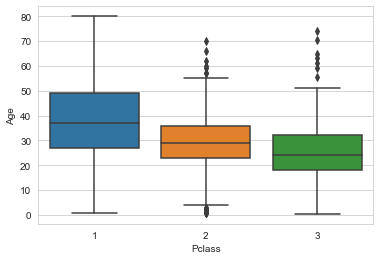

In [88]:
sns.boxplot(x='Pclass', y='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

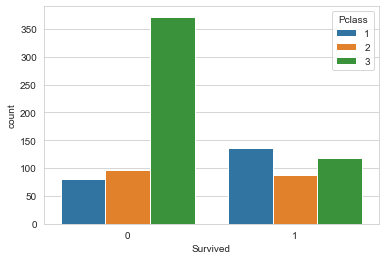

In [89]:
sns.countplot(x='Survived', data=df, hue='Pclass')

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

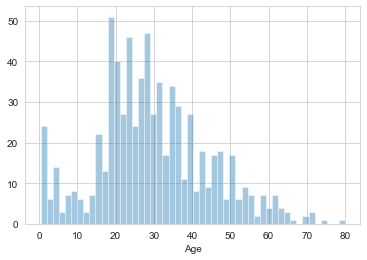

In [90]:
sns.distplot(df['Age'].dropna(),kde=False,bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

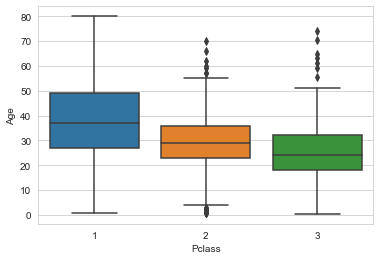

In [91]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [92]:
def impute_age(args):
    Pclass=args[0]
    Age=args[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 23
    else:
        return Age

In [93]:
df['Age'] = df[['Pclass','Age']].apply(impute_age,axis=1)

<AxesSubplot:>

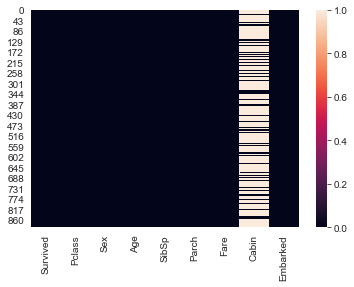

In [94]:
sns.heatmap(df.isnull())

In [95]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

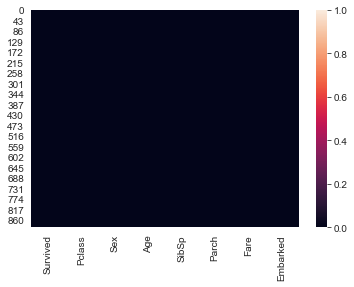

In [96]:
sns.heatmap(df.isnull())

In [97]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)
Sex = pd.get_dummies(df['Sex'], drop_first=True)

In [98]:
df.drop(['Embarked','Sex'],axis=1,inplace=True)

In [99]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [101]:
df = pd.concat([df,Embarked,Sex], axis=1)

In [102]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
